<a href="https://colab.research.google.com/github/AinsleyJacquemain/ASTRON-1221/blob/main/Exoplanet_Project_Ainsley_Jacquemain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASTRO 1221 -- Exoplanet Project

This code belongs to Ainsley Jacquemain and contains a detection of an exoplanet by means of the transit method and tests the fit of the transit models created for said exoplanet.

My partners are Maggie Ramsey and Lisa Chiang. ☺


The Transit Method measures the luminous energy (and the potential dimming of said energy by an orbiting body) of a star to determine if an exoplanet exists.

Let $\delta$ equal the ratio of the observed change in flux, or the amount of energy from a luminous body that reaches a surface. $\delta$ can be known simply as the 'flux drop'.

$\delta = (\frac{R{planet}}{R{star}})^2$

$(R_{planet} = \sqrt\delta \times R_{star})$

We can use the equation for $\delta$ to determine the dimming of the star's light due to the orbiting planet.

As an example, we will use earth and Jupiter as the orbiting bodies to the sun.

In this code we will investigate an exoplanet discovered by the Transit Method and recreate those results to 'detect' the exoplanet ourselves.

I have chosen exoplanet WASP-1.

First, we will import the data for WASP-1 from the NASA Exoplanet Archives.

In [1]:
import numpy as np # import numpy package, which allows us to conduct mathematical operations for the defined quantities.
import matplotlib.pyplot as plt # import the plotting package.
import astropy.units as u # import a Python package to call certain units.
import astropy.constants as ac # import a Python package to call the value of certain constants.
import astropy.io.ascii as ascii # import a Python package to read and interpret the data that will be imported.

In [2]:
from google.colab import files # this data comes from exoplanet WASP-1 on the NASA Exoplanet Archive.
uploaded = files.upload() # upload the data.

Saving plot.tbl to plot.tbl


In [48]:
dat = ascii.read("plot.tbl") # the ascii package reads the data.

In [49]:
dat # the data table is presented below.

set,HJD,Relative_Flux
int64,float64,float64
0,2454005.6404,1.00235
0,2454005.64088,0.99903
0,2454005.64138,0.99851
0,2454005.64185,1.0032
0,2454005.64234,1.00153
0,2454005.64283,0.99992
0,2454005.64332,1.00388
0,2454005.64378,1.00437
0,2454005.64428,1.00263


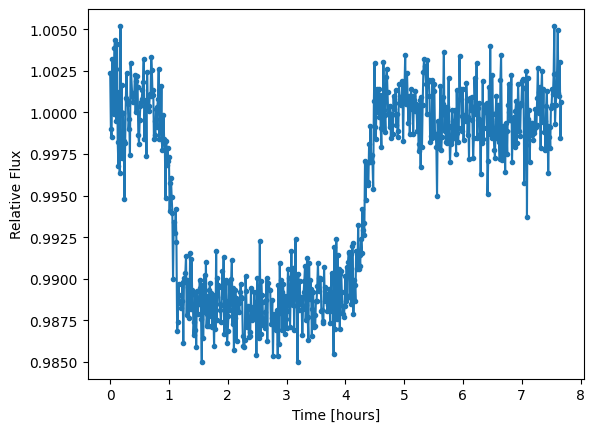

In [46]:
# Below we will plot the transit pattern from the data above.

time_obs = dat["HJD"] # our time observation is in days and will need to be converted into hours.
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # define the temporal data as seen along the x-axis.
flux_obs = dat["Relative_Flux"] # define the flux data as seen along the y-axis.
plt.plot(time_obs, flux_obs, marker=".") # define the parameters as seen in the plot.
plt.xlabel("Time [hours]") # label the x-axis.
plt.ylabel("Relative Flux") # label the y-axis.
plt.show() # show the plot.

Note the dip in the graph above. This is the 'flux drop'-- the dimming of luminous energy by an orbiting body (our exoplanet) that passes in front of an observer (us) of the luminous body (our star).

Now that we have plotted our imported data, we will find models that fit said data in order to represent the flux drop in our transit plots.

We will start with the simplier of models: the box model.

In [60]:
def box_model(time_arr, t_0, tau, delta): # time_arr, t_0, tau, and delta are the parameters of this function.
    flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # define the flux value as seen along the y-axis.
    time_start = t_0 - tau / 2 # define the time (the x-value) at which flux starts to drop.
    time_end = t_0 + tau / 2 # define the time (the x-value) at which flux starts to rise.
    ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # select an index in the time array to give a flux array value.
    flux_arr[ind] = 1.0 - delta # define the flux value as seen along the y-axis under this index.
    return flux_arr #return the function.

In [51]:
# Now we must insert values into our parameters. Because this is an approximation of what we see in the original data, we will 'eyeball' this step.
t_0 = 2.652 * u.hour # estimate value.
tau = 3.15 * u.hour # estimate value.
delta = 0.0115 # estimate value.
flux_model = box_model(time_obs, t_0, tau, delta) # use the function to define our new model.

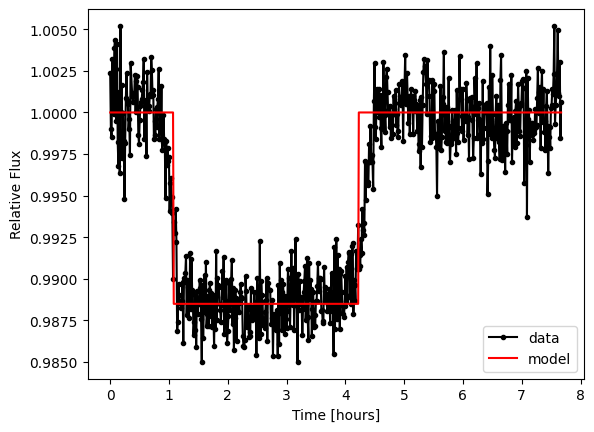

In [52]:
# Below we will superimpose our box model over the transit pattern from the data above.

time_obs = dat["HJD"] # our time observation is in days and will need to be converted into hours.
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # define the temporal data as seen along the x-axis.
flux_obs = dat["Relative_Flux"] # define the flux data as seen along the y-axis.
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # define the parameters as seen in the plot.
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # define the parameters as seen in our box model.
plt.xlabel("Time [hours]") # label the x-axis.
plt.ylabel("Relative Flux") # label the y-axis.
plt.legend() # plot a legend-- we have superimposed our model over the actual data.
plt.show() # show the plot.

Here (where we are still looking at our box model) we investigate the error between the transit data and our model. This error will help us to make a conclusion as to the model's fitness to represent the data.

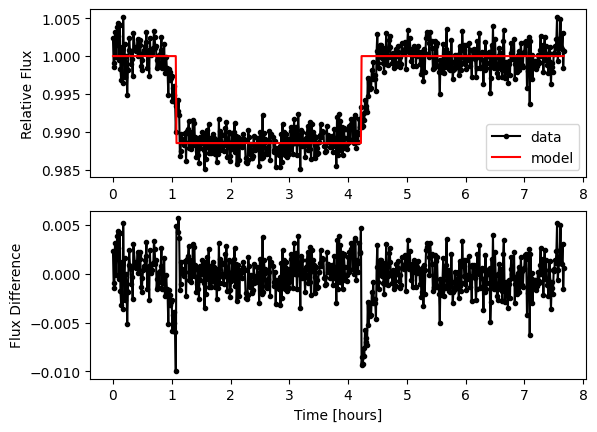

In [47]:
plt.subplot(2, 1, 1) # we will plot our box model superimposed over the transit data.

time_obs = dat["HJD"] # our time observation is in days and will need to be converted into hours.
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # define the temporal data as seen along the x-axis.
flux_obs = dat["Relative_Flux"] # define the flux data as seen along the y-axis.
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # define the parameters as seen in the plot.
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # define the parameters as seen in our box model.
# plt.xlabel("Time [hours]") # we would have labeled the x-axis, but only one label is needed. Look at the subplot below.
plt.ylabel("Relative Flux") # label the y-axis.
plt.legend() # plot a legend-- we have superimposed our model over the actual data.

plt.subplot(2, 1, 2) # we will plot the error between our box model and the transit data.

plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") # define the error between our box model and the transit data.
plt.xlabel("Time [hours]") # label the x-axis.
plt.ylabel("Flux Difference") # label the y-axis.

plt.show() # show the plot.

Notice the significant error. We will perform a reduced chi-square statistic to determine its fitness in representing the transit data before we try another model.

The chi-square statistic is a formula to compare statistical data sets and determine the 'goodness of fit.' The lower the value, the more confident the fit of the given theoretical model (i.e. the less difference between what is observed and what is expected.) The chi-square formula is as follows:

$X^2 = \sum\frac{(O_i-C_i)^2}{σ_i^2}$

The reduced chi-square statistic is similar to the chi-square statistic, but instead takes into account the data size by dividing chi-square by the degrees of freedom. This is a 'normalized' chi-squared statistic. The reduced chi-square is as follows:

$X_v^2 = \frac{X^2}{v}$

In chi-square and reduced chi-square statistics...
*   $O$ = the observation
*   $C$ = the calculation
*   $σ$ = the measurement error
*   $v$ = the degrees of freedom = $n - m$
    *   $n$ = the number of data points used in fitting
    *   $m$ = the number of fitting parameters
        *   $m$ = 2 for a linear fit
        *   $m$ = 3 for a quadratic fit

We will calculate $X_v^2$, which we would ideally like to be close to 1 from either direction.

In [53]:
def calculate_reduced_Chi2(flux, model, num_parameters): # flux, model, and num_parameters are the parameters of this function.
  degree_freedom = len(flux_obs) - num_parameters # define the degrees of freedom (=651.)
  rChi2 = np.sum((flux_obs - flux_model)**2 / np.sqrt(flux_obs)**2) / degree_freedom # define the reduced chi-square.
  return(rChi2) # return the function.
print("Reduced Chi2 = ", calculate_reduced_Chi2(flux_obs, flux_model, 4)) # print the function to investigate the reduced chi-square value.

Reduced Chi2 =  4.4171033371792315e-06


Notice that our reduced chi-square value is very good. But could it be better with a model that better fits the data?

We will look at a slightly more complicated model: the trapezoidal model.

In [61]:
# NOTE: Gemini AI was used for this part of the model because Professor Wang's model was not compatible with my imported data.
# prompt: model a trapezoid-shaped transit light curve to fit the imported data.

def trapezoid_model(time_arr, t_0, tau_rise, tau_transit, tau_fall, delta): # time_arr, t_0, tau_rise, tau_transit, tau_fall, and delta are the parameters of this function.
    """
    Models a trapezoid-shaped transit light curve.

    Args:
        time_arr: Array of time values.
        t_0: Time of mid-transit.
        tau_rise: Duration of the transit ingress.
        tau_transit: Duration of the flat bottom of the transit.
        tau_fall: Duration of the transit egress.
        delta: Transit depth.

    Returns:
        Array of model flux values.
    """
    flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # define the flux value as seen along the y-axis.

    # Calculate the different transit phases.
    time_ingress_start = t_0 - (tau_transit + tau_fall) / 2
    time_ingress_end = t_0 - (tau_transit) / 2
    time_transit_start = t_0 - tau_transit / 2
    time_transit_end = t_0 + tau_transit / 2
    time_egress_start = t_0 + tau_transit / 2
    time_egress_end = t_0 + (tau_transit + tau_rise) / 2

    # Ingress
    ingress_indices = np.where((time_arr >= time_ingress_start) & (time_arr < time_ingress_end)) # select ingress indeces in the time array to give a flux array value.
    flux_arr[ingress_indices] = 1.0 - delta * (time_arr[ingress_indices] - time_ingress_start) / tau_rise # define the flux value as seen along the y-axis under these indeces.

    # Transit
    transit_indices = np.where((time_arr >= time_transit_start) & (time_arr < time_transit_end)) # select transit indeces in the time array to give a flux array value.
    flux_arr[transit_indices] = 1.0 - delta # define the flux value as seen along the y-axis under these indeces.

    #Egress
    egress_indices = np.where((time_arr >= time_egress_start) & (time_arr < time_egress_end)) # select egress indeces in the time array to give a flux array value.
    flux_arr[egress_indices] = 1.0 - delta + delta * (time_arr[egress_indices] - time_egress_start) / tau_fall # define the flux value as seen along the y-axis under these indeces.

    return flux_arr #return the function.

In [55]:
# Now we must insert values into our parameters. Because this is an approximation of what we see in the original data, we will 'eyeball' this step.
t_0 = 2.652 * u.hour # estimate value.
tau_rise = 0.40 * u.hour  # estimate value.
tau_transit = 3.15 * u.hour # estimate value.d
tau_fall = 0.35 * u.hour  # estimate value.
delta = 0.0115 # estimate value.
flux_model_trapezoid = trapezoid_model(time_obs, t_0, tau_rise, tau_transit, tau_fall, delta) # use the function to define our new model.

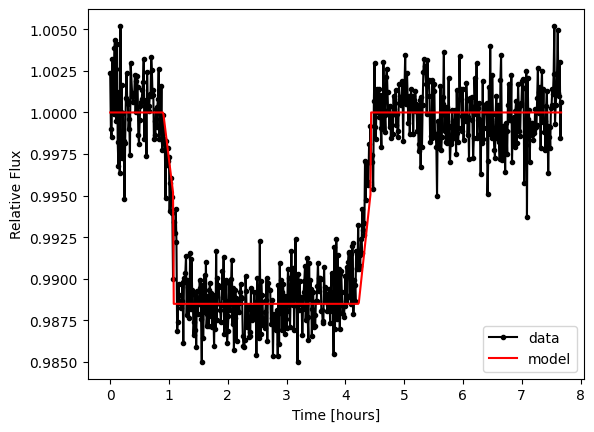

In [56]:
# Below we will superimpose our box model over the transit pattern from the data above.

time_obs = dat["HJD"] # our time observation is in days and will need to be converted into hours.
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # define the temporal data as seen along the x-axis.
flux_obs = dat["Relative_Flux"] # define the flux data as seen along the y-axis.
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # define the parameters as seen in the plot.
plt.plot(time_obs, flux_model_trapezoid, linestyle="-", color="red", label="model") # define the parameters as seen in our box model.
plt.xlabel("Time [hours]") # label the x-axis.
plt.ylabel("Relative Flux") # label the y-axis.
plt.legend() # plot a legend-- we have superimposed our model over the actual data.
plt.show() # show the plot.

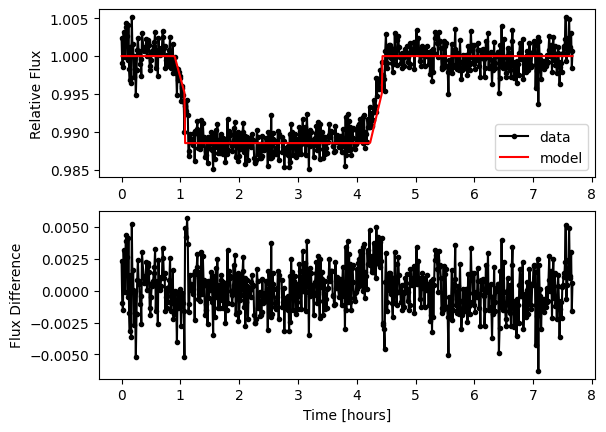

In [57]:
plt.subplot(2, 1, 1) # we will plot our box model superimposed over the transit data.

time_obs = dat["HJD"] # our time observation is in days and will need to be converted into hours.
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # define the temporal data as seen along the x-axis.
flux_obs = dat["Relative_Flux"] # define the flux data as seen along the y-axis.
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # define the parameters as seen in the plot.
plt.plot(time_obs, flux_model_trapezoid, linestyle="-", color="red", label="model") # define the parameters as seen in our box model.
# plt.xlabel("Time [hours]") # we would have labeled the x-axis, but only one label is needed. Look at the subplot below.
plt.ylabel("Relative Flux") # label the y-axis.
plt.legend() # plot a legend-- we have superimposed our model over the actual data.

plt.subplot(2, 1, 2) # we will plot the error between our box model and the transit data.

plt.plot(time_obs, flux_obs - flux_model_trapezoid, marker=".", color="black") # define the error between our box model and the transit data.
plt.xlabel("Time [hours]") # label the x-axis.
plt.ylabel("Flux Difference") # label the y-axis.

plt.show() # show the plot.

Notice that the error is much better for the trapezoidal model than it is for the box model.

In [59]:
def calculate_reduced_Chi2(flux, model, num_parameters): # flux, model, and num_parameters are the parameters of this function.
  degree_freedom = len(flux_obs) - num_parameters # define the degrees of freedom (=651.)
  rChi2 = np.sum((flux_obs - flux_model_trapezoid)**2 / np.sqrt(flux_obs)**2) / degree_freedom # define the reduced chi-square.
  return(rChi2) # return the function.
print("Reduced Chi2 = ", calculate_reduced_Chi2(flux_obs, flux_model_trapezoid, 4)) # print the function to investigate the reduced chi-square value.

Reduced Chi2 =  3.2688503695536385e-06


Notice that our reduced chi-square value is very good, and much better than the box model. The trapezoidal model is now our preferred model. ☺